<figure>
<img src="../Imagenes/logo-final-ap.png"  width="80" height="80" align="left"/> 
</figure>

# <span style="color:blue"><left>Aprendizaje Profundo</left></span>

# <span style="color:red"><center>Optimización multivariada usando JAX </center></span>

##   <span style="color:blue">Autores</span>

1. Alvaro Mauricio Montenegro Díaz, ammontenegrod@unal.edu.co
2. Daniel Mauricio Montenegro Reyes, dextronomo@gmail.com 

##   <span style="color:blue">Profesores</span>

1. Alvaro Mauricio Montenegro Díaz, ammontenegrod@unal.edu.co
2. Daniel Mauricio Montenegro Reyes, dextronomo@gmail.com 
3. Campo Elías Campo Turriago, cepardot@unal.edu.co
5. Oleg Jarma, ojarmam@unal.edu.co 

##   <span style="color:blue">Asesora Medios y Marketing digital</span>
 

4. Maria del Pilar Montenegro, pmontenegro88@gmail.com 

## <span style="color:blue">Contenido</span>

* [Introducción](#Introducción)
* [Carga módulos](#Carga-módulos)
* [Genera y grafica datos simulados](#Genera-y-grafica-datos-simulados)
* [Función de pérdida](#Función-de-Pérdida)
* [Gradiente descendiente](#Gradiente-descendiente)
* [Optimización](#Optimización)
* [Parámetros finales](#Parámetros-finales)
* [Visualizando la función pérdida](#Visualizando-función-pérdida)


## <span style="color:blue">Introducción</span> 

En este ejercicio generamos un conjunto de datos que sigue un modelo lineal, pasando por el origen. Lo datos son contaminado con un error normal $N(0,2^2)$.

## <span style="color:blue">Carga módulos</span> 

In [1]:
from __future__ import print_function
import numpy as np
import jax.numpy as jnp
import matplotlib.pyplot as plt
from jax import grad,jit
import pandas as pd

## <span style="color:blue">Genera y grafica datos simulados</span> 

In [2]:
# Simulate Data

# Choose a Seed
np.random.seed(22)

# Generate Data
x=jnp.linspace(-2,2,100)
y=3*x+5*(np.random.normal(1,0.3,len(x)))


#Print Results
#print("x:\n",x,"\n")
#print("y:\n",y)

data=pd.DataFrame({"Mediciones":x,"Observaciones":y})
data

,Mediciones,Observaciones
0,-2.000000,-1.137925
1,-1.959596,-3.073814
2,-1.919192,0.865112
3,-1.878788,-0.995352
4,-1.838384,-1.251846
...,...,...
95,1.838384,11.819170
96,1.878788,10.311218
97,1.919192,10.783253
98,1.959596,11.913359


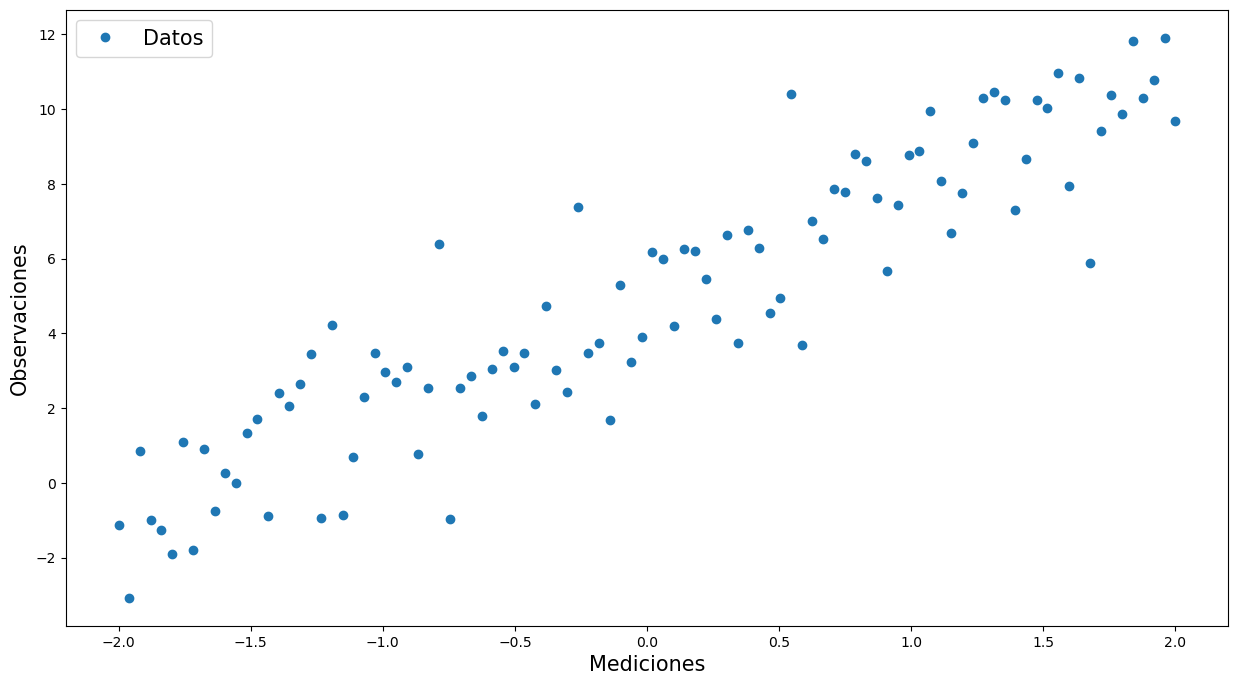

In [3]:
plt.figure(figsize=(15,8))
plt.plot(x,y,'o')
plt.xlabel("Mediciones",fontsize=15)
plt.ylabel("Observaciones",fontsize=15)
plt.legend(["Datos"],fontsize=15)
plt.show()

## <span style="color:blue">Función de pérdida</span>  

In [4]:
def loss(β0,β1,x,y):
    return ((y-(β1*x+β0))**2).mean()

## Diferenciación Automática
grad_loss=jit(grad(loss,argnums=(0,1)))

## <span style="color:blue">Gradiente descendiente </span>  

In [5]:
def optimize(β0,β1,x,y,h=1.5):
    
    # Calcular Derivada
    β0_grad,β1_grad=grad_loss(β0,β1,x,y)
    
    # Gradiente Descendiente
    β1-=β1_grad*h
    β0-=β0_grad*h
    
    # Regresar Nuevos parámetros
    return β0,β1

## <span style="color:blue">Optimización</span>  

In [6]:
## Initial Guess
Β0,Β1=100.,100.

# Acumular resultados
β0,β1=[],[]
train_loss=[]
# Número de veces que se cambiar los parámetros
epochs=300

# Tasa de Aprendizaje
lr=0.01

print("Perdidas:\n")

for epoch in range(epochs):
    
    Β0,Β1=optimize(Β0,Β1,x,y,lr)
    
    β0.append(Β0)
    β1.append(Β1)
    
    losss=loss(Β0,Β1,x,y)
    
    train_loss.append(losss)
    if epoch%10==0:
        print(f"Iteración {epoch}: {losss}")

Perdidas:

Iteración 0: 20803.392578125
Iteración 10: 12779.0595703125
Iteración 20: 7892.662109375
Iteración 30: 4901.59716796875
Iteración 40: 3060.91064453125
Iteración 50: 1922.009033203125
Iteración 60: 1213.4837646484375
Iteración 70: 770.3118286132812
Iteración 80: 491.6374206542969
Iteración 90: 315.4940185546875
Iteración 100: 203.6027374267578
Iteración 110: 132.1884765625
Iteración 120: 86.40408325195312
Iteración 130: 56.92798614501953
Iteración 140: 37.87733459472656
Iteración 150: 25.520587921142578
Iteración 160: 17.47943115234375
Iteración 170: 12.231059074401855
Iteración 180: 8.796314239501953
Iteración 190: 6.5430588722229
Iteración 200: 5.061695575714111
Iteración 210: 4.085932731628418
Iteración 220: 3.442113161087036
Iteración 230: 3.0166749954223633
Iteración 240: 2.735172748565674
Iteración 250: 2.5486931800842285
Iteración 260: 2.4250361919403076
Iteración 270: 2.342963457107544
Iteración 280: 2.2884490489959717
Iteración 290: 2.2522146701812744


## <span style="color:blue"> Parámetros finales </span>

In [7]:
print(β1[-1])
print(β0[-1])

2.996511
5.1412616


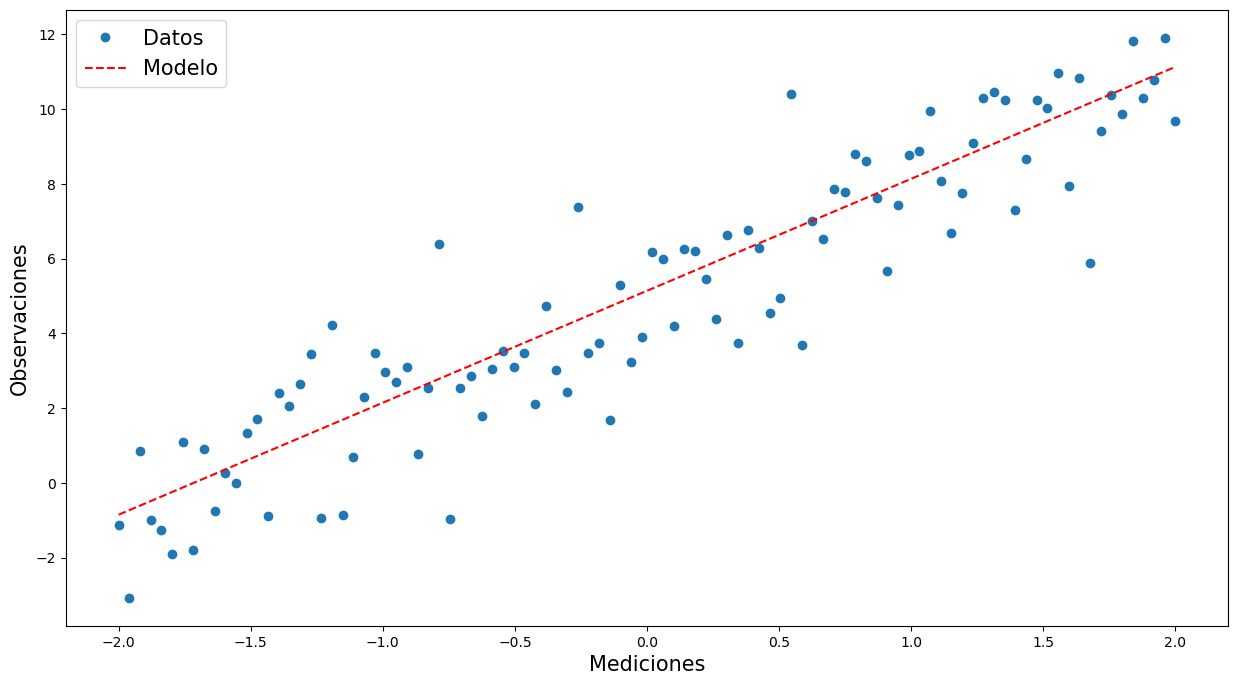

In [8]:
# Make Model

mod=β1[-1]*x+β0[-1]

plt.figure(figsize=(15,8))
plt.plot(x,y,'o')
plt.plot(x,mod,'r--')
plt.xlabel("Mediciones",fontsize=15)
plt.ylabel("Observaciones",fontsize=15)
plt.legend(["Datos","Modelo"],fontsize=15)
plt.show()

## <span style="color:blue">Visualizando la función pérdida </span>  

In [9]:
# eje β (par.)
β0x=jnp.linspace(β0[-1]-100,β0[-1]+100,100)
β1y=jnp.linspace(β1[-1]-100,β1[-1]+100,100)

bx,by=np.meshgrid(β0x,β1y)

l=jnp.empty(shape=(len(β0x),len(β1y)))

for i in range(len(β0x)):
    for j in range(len(β1y)):
        l.at[i,j].set(jnp.mean((by[i,j]*x+bx[i,j]-y)**2))
        #l[i,j]=((by[i,j]*x+bx[i,j]-y)**2).mean()

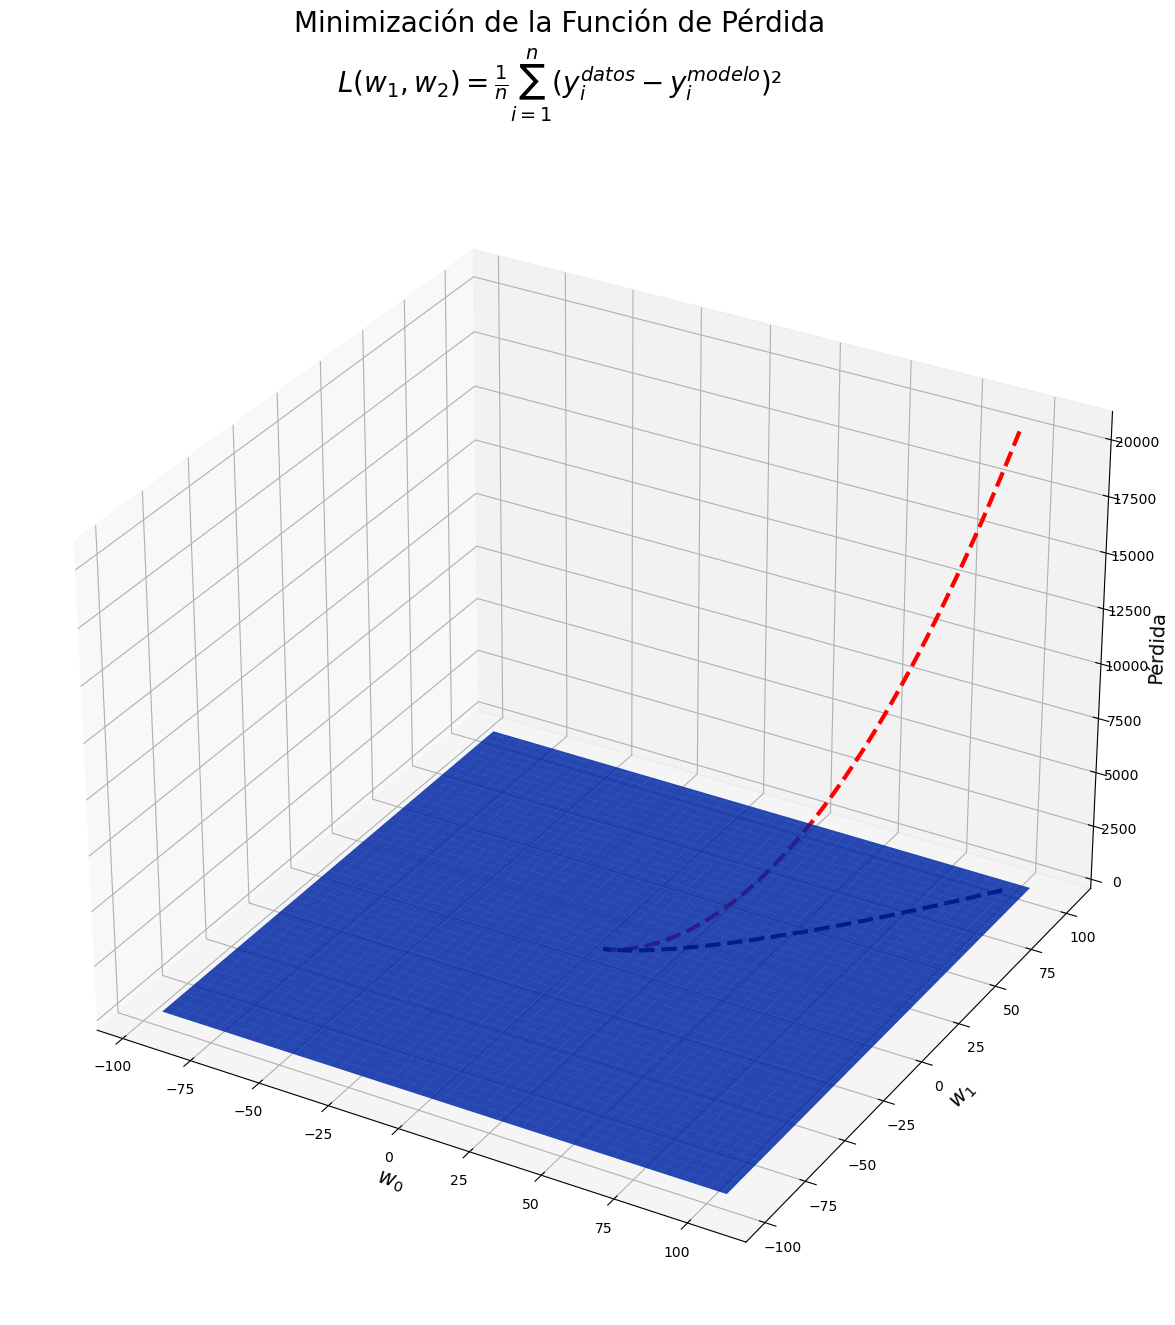

In [10]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(22,15))
plt.suptitle("Minimización de la Función de Pérdida\n"+r"$L( w_{1}, w_{2})=\frac{1}{n}\sum_{i=1}^{n}(y_i^{datos}-y_i^{modelo})²$",fontsize=20)
ax = plt.axes(projection='3d')

ax.plot_surface(bx,by,l,alpha=0.6,cmap='jet') # Loss Surface

ax.plot(β0,β1,train_loss,'r--',lw=3) # Path Taken by Optimizer
ax.contourf(bx,by,l,25,offset=-1,cmap='jet',alpha=0.6,antialiased=True) # Level Curves of Surface
ax.plot(β0,β1,'k--',lw=3) # Projection of the Path

ax.set_xlabel(r"$w_0$",fontsize=15)
ax.set_ylabel(r"$w_1$",fontsize=15)
#ax.zaxis.set_rotate_label(False)  # disable automatic rotation
ax.set_zlabel("Pérdida",fontsize=14,rotation=90)
#ax.view_init(30, 100)
#plt.legend(["Descenso del Gradiente","Proyección del Descenso"])
#plt.savefig('GD_3D.png')
plt.show()

In [14]:
%matplotlib qt

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(22,15))
plt.suptitle("Minimización de la Función de Pérdida\n"+r"$L( w_{1}, w_{2})=\frac{1}{n}\sum_{i=1}^{n}(y_i^{datos}-y_i^{modelo})²$",fontsize=20)
ax = plt.axes(projection='3d')

ax.plot_surface(bx,by,l,alpha=0.6,cmap='jet') # Loss Surface

ax.plot(β0,β1,train_loss,'r--',lw=3) # Path Taken by Optimizer
ax.contourf(bx,by,l,25,offset=-1,cmap='jet',alpha=0.6,antialiased=True) # Level Curves of Surface
ax.plot(β0,β1,'k--',lw=3) # Projection of the Path

ax.set_xlabel(r"$w_0$",fontsize=15)
ax.set_ylabel(r"$w_1$",fontsize=15)
#ax.zaxis.set_rotate_label(False)  # disable automatic rotation
ax.set_zlabel("Pérdida",fontsize=14,rotation=90)
#ax.view_init(30, 100)
#plt.legend(["Descenso del Gradiente","Proyección del Descenso"],fontsize=15)
#plt.savefig('GD_3D.png')
plt.show()

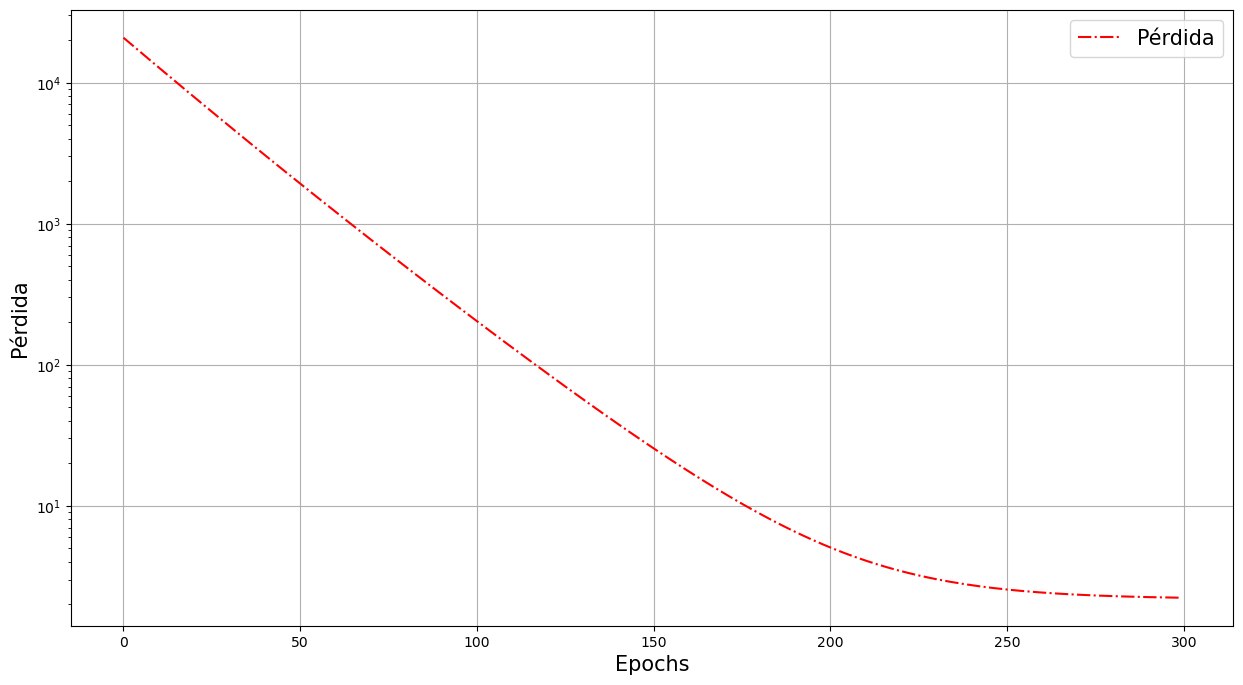

In [12]:
%matplotlib inline
plt.figure(figsize=(15,8))
plt.semilogy(range(epochs),train_loss,'r-.')
plt.xlabel("Epochs",fontsize=15)
plt.ylabel("Pérdida",fontsize=15)
plt.legend(["Pérdida"],fontsize=15)
plt.grid()
plt.show()